In [1]:
import gym
import random
import numpy as np
import time
import matplotlib.pyplot as plt

In [6]:
# paramters and environments

env = gym.make("Pendulum-v1")

discrete_os_size = (13, 11, 12)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/discrete_os_size
discrete_os_nsize = (14, 12, 13)
discrete_action_size = (2)
discrete_action_win_size = (env.action_space.high - env.action_space.low)/discrete_action_size
q_table = np.random.random(discrete_os_nsize + (discrete_action_size,))

In [3]:
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(int))

class QAgent():
    def __init__(self, env):
        self.action_low = env.action_space.low
        self.action_high = env.action_space.high
        self.eps = 0.01
        self.discount = 0.91
        self.lr = 0.06
    def get_action(self, state, env):
        d_state = get_discrete_state(state)
        action = [-2.0 + (np.argmax(q_table[d_state]))*4.0]                         
        if(random.random() < self.eps):
            return env.action_space.sample()
        else:
            return action             
    def train(self, state, action, next_state, reward, done):
        d_state = get_discrete_state(state)
        next_d_state = get_discrete_state(next_state)
        if(done==True):
            future_q = np.zeros(discrete_action_size)
        else:    
            future_q = q_table[next_d_state]
        current_q = q_table[d_state + (np.argmax(q_table[d_state]),)]
        target_q = reward + self.discount*np.max(future_q)
        update = target_q - current_q
        q_table[d_state + (np.argmax(q_table[d_state]),)] += self.lr*update
        if(done==True):
            self.eps = self.eps*0.98

<ipython-input-7-92bf9d614cac>:20: RuntimeWarning: divide by zero encountered in double_scalars
  aggr_rewards['avg'].append(avg_reward/ep)


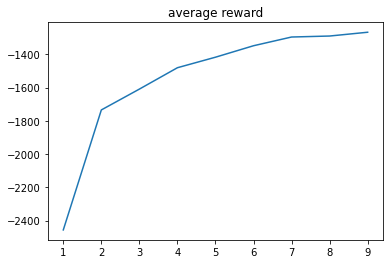

In [7]:
agent = QAgent(env)
t_reward = 0
info = 0
aggr_rewards = {'avg': []}

ep_len = 0
avg_reward = 0
state = env.reset()
done = False
for ep in range(10):
    for i in range(200):
        ep_len += 1
        action = agent.get_action(state, env)
        next_state, reward, done, info = env.step(action)
        agent.train(state, action, next_state, reward, done)
        state = next_state
        t_reward += reward
        avg_reward += reward 
        env.render()
    aggr_rewards['avg'].append(avg_reward/ep)   
env.close()

plt.title('average reward')
plt.plot(aggr_rewards['avg'])
plt.savefig('Cell_4_out.jpg',dpi = 450)